## ECS 171 Homework 1 - Sample Solutions

Please explain your solutions clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution. Please put your work/solution for each question after the corresponding horizontal line in a separate coding or markdown box. Feel free to add coding or markdown boxes as you see fit. Usage of the numpy, pandas, seaborn, matplotlib and sklearn libraries are allowed.

### Question 1 - (5 points)
How does the presence of outliers influence the choice between using covariance and correlation to analyze the relationship between two variables in a dataset? Explain how each measure handles outliers differently and discuss the implications for interpreting their results in practical applications.
***

Covariance is sensitive to outliers while correlation is more robust against outliers. Correlation takes covariance and normalizes it by dividing by the product of the standard deviations of both variables. This normalization reduces the influence of outliers, providing a more reliable measure of the linear relationship's strength and direction. In contrast covariance can be heavily skewed by outliers.

A high covariance with a low correlation suggests outliers are present because the standardization would lower the impact of outliers. A low covariance with a higher correlation suggests the variables might have a non-linear relationship because covariance captures only linear trends. 

In practical application correlation can be more useful as a more robust method of representing the overall linear relationship. However, covariance may be useful to use to detect outliers and apply methods to remove or edit influential outliers to create a more accurate model.

### Question 2 - (25 points)
The following code provides the distribution of the attributes of the breast cancer dataset from sklearn library. 


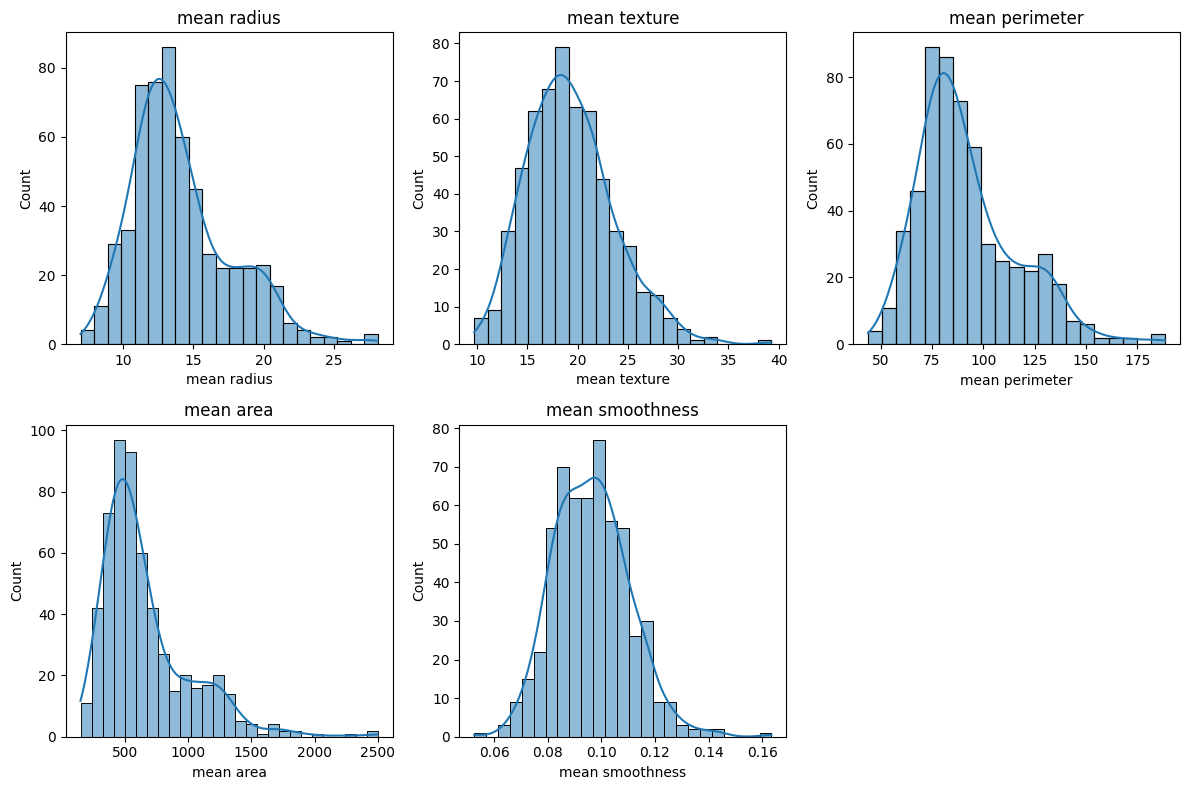


mean:
mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
mean smoothness      0.096360
dtype: float64 , 
median:
mean radius         13.37000
mean texture        18.84000
mean perimeter      86.24000
mean area          551.10000
mean smoothness      0.09587
dtype: float64 , 
std:
 mean radius          3.524049
mean texture         4.301036
mean perimeter      24.298981
mean area          351.914129
mean smoothness      0.014064
dtype: float64


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Plot histograms for some of the features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#### Question 2.1 - (10 points)
Analyze each plot and explain your observations regarding these attributes in terms of data skewness (for instance, is the data symmetric, if not is it right/left skewed? Why and how do you identify the skewness by using the parameters of the distributions such as mean, median, standard deviation?) Provide a complete analysis and incude any supporting explanation/computation if relevant.
***

All attributes here are right skewed
- visually the tail is longer on the right
- mean is greater than median
- std tells us that skewness does exist, but does not indicate if it is left or right

#### Question 2.2 - (5 points)
Explain and compare the parameters and output of Z-score and Min-Max data transformation techniques. 
***

Z-score
- parameters: inherent properties of the Data that is passed in (mean and standard deviation)
- output: transforms the data to have a mean of 0 and a standard deviation of 1 - each value corresponds to the number of standard deviations it is from the mean

Min-Max
- parameters: other than the data, a range specifying the min/max of the transformed data
- output: scales the data to a specific range, often 0 to 1 (but can be adjusted).
Min-max should be used when you have a desired range, while z-score is a good option with normally distributed data.

For this question, answering with coding example is also fine as long as you explain and compare.
***

#### Question 2.3 - (5 points)
Apply the Z-score normalization technique on the dataset. You can either develop the normalization function from scratch, or use sklearn.preprocessing to make function calls to perform the transformation. After data normalization, visualize the normalized attriubutes (note: don't normalize the output variable - apply normalization on these attributes: 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'). Compare the data before and after normalization. What changes you see in the data? 
***

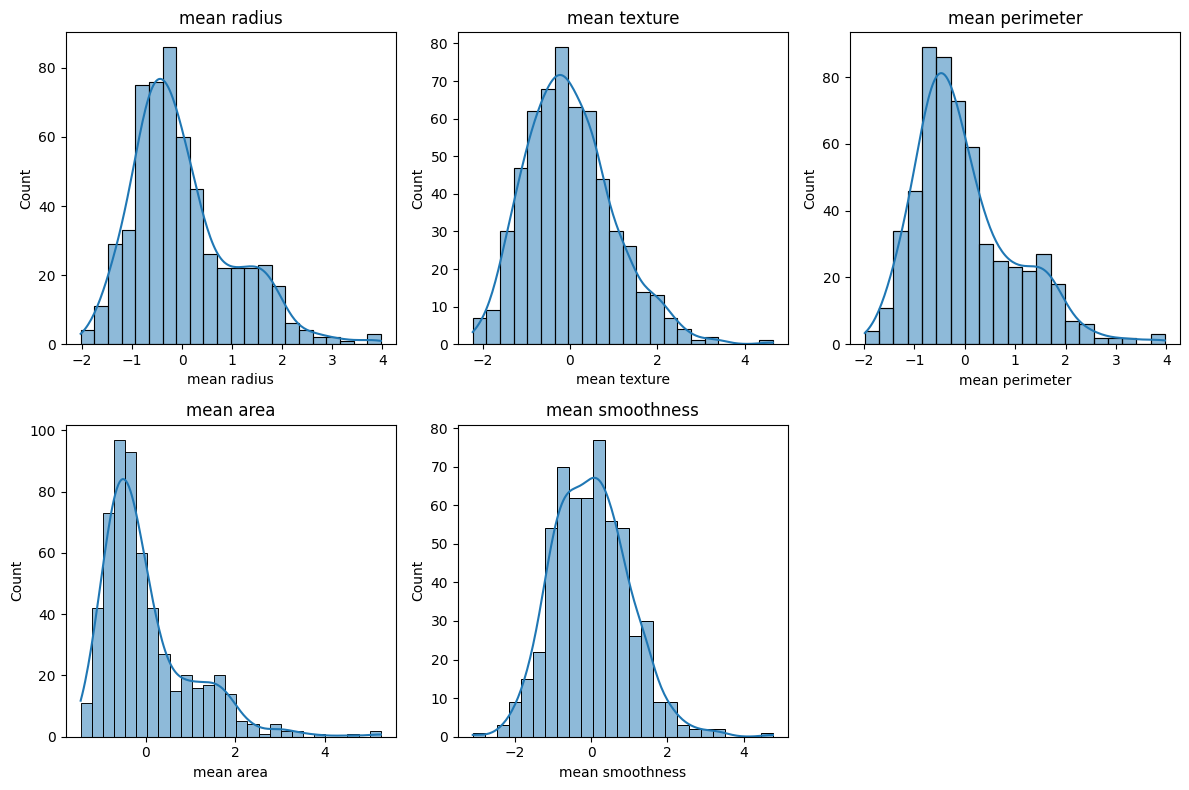


mean:
mean radius       -3.162087e-15
mean texture      -6.558316e-15
mean perimeter    -6.938406e-16
mean area         -8.468133e-16
mean smoothness    6.147006e-15
dtype: float64 , 
median:
mean radius       -0.214893
mean texture      -0.104544
mean perimeter    -0.235773
mean area         -0.294927
mean smoothness   -0.034860
dtype: float64 , 
std:
 mean radius        1.0
mean texture       1.0
mean perimeter     1.0
mean area          1.0
mean smoothness    1.0
dtype: float64


In [2]:
# Solution - coding of the normalization of the data. TAs: complete the remaining.

# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Load the dataset
breast_cancer_data = load_breast_cancer()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)


# Create a DataFrame with selected features
X = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)[features_to_plot]

# Normalizing the independent variables using z-score normalization
data_mean = X.mean()
data_std = X.std()
# Perform z-score normalization
normalized_X_zscore = (X - data_mean) / data_std


# Plot histograms for some of the features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(normalized_X_zscore[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(normalized_X_zscore.mean() , normalized_X_zscore.median(), normalized_X_zscore.std()))


After normalization the data is centered around 0. We can also see that the std is always 1 and that the datapoints are scaled to how many standard deviations they are from the mean.

#### Question 2.4 - (5 points)
Find the outliers in the data (for the identified attributes) if any, by computing the interquartile ranges for Q1, Q2, Q3, IQR, min and max. Also visualize the outliers if any. 
***


Q1:
mean radius         11.70000
mean texture        16.17000
mean perimeter      75.17000
mean area          420.30000
mean smoothness      0.08637
Name: 0.25, dtype: float64 , 
Q2:
mean radius         13.37000
mean texture        18.84000
mean perimeter      86.24000
mean area          551.10000
mean smoothness      0.09587
Name: 0.5, dtype: float64 , 
Q3:
mean radius         15.7800
mean texture        21.8000
mean perimeter     104.1000
mean area          782.7000
mean smoothness      0.1053
Name: 0.75, dtype: float64 , 
IQR:
mean radius          4.08000
mean texture         5.63000
mean perimeter      28.93000
mean area          362.40000
mean smoothness      0.01893
dtype: float64 , 
min:
mean radius          6.98100
mean texture         9.71000
mean perimeter      43.79000
mean area          143.50000
mean smoothness      0.05263
dtype: float64 , 
max:
mean radius          28.1100
mean texture         39.2800
mean perimeter      188.5000
mean area          2501.0000
mean smooth

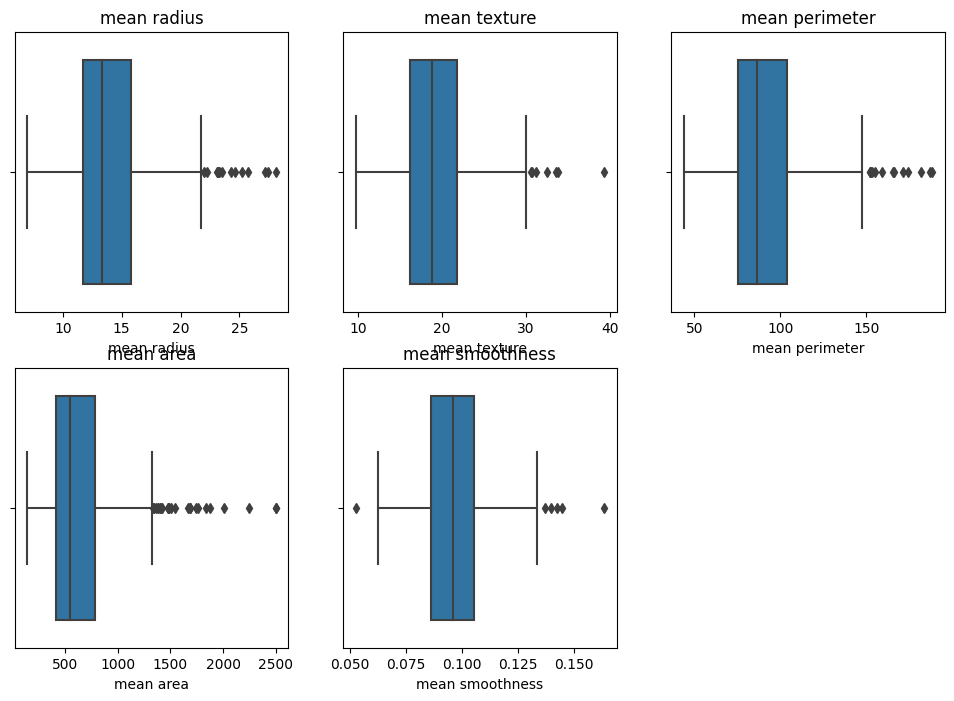

In [6]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Load the dataset
breast_cancer_data = load_breast_cancer()

# Create a DataFrame with selected features
X = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)[features_to_plot]

# Compute the IQR Q1, Q2, Q3, IQR, min and max. Visualize with a boxplot
Q1 = X.quantile(0.25)
Q2 = X.quantile(0.5)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
min = X.min()
max = X.max()

# plot
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=X[feature])
    plt.title(feature)

print("\nQ1:\n{} , \nQ2:\n{} , \nQ3:\n{} , \nIQR:\n{} , \nmin:\n{} , \nmax:\n{}".format(Q1, Q2, Q3, IQR, min, max))

# print out the number outliers that were found
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
print("\nOutliers:\n", outliers.sum())


### Question 3 - (30 points)
For this question, use the [California House Prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from sklearn. The goal is to develop a linear regression model to predict the target variable (MedHouseVal) which represents the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). Note that the precision of changes to look for in this dataset may be relatively small so keep an eye out for smaller changes in the difference between models - in the range of around 2 percent or more between models.

#### Question 3.1 - (10 points)
Split your data into train and test sets by [80:20] rate (80\% for training and 20\% for testing). Initialize a LinearRegression model using the LinearRegression algorithm in sklearn. Evaluate the performance of the model on the test data by reporting MSE and R2 values (you can call the existing functions in sklearn to report MSE and R2, or you can develop these techniques from scratch). Visualize the relatioship between y and y_hat in test data (see the example plot covered during lec3-slide# 7).
***

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[[   8.3252       41.            6.98412698    1.02380952  322.
     2.55555556   37.88       -122.23      ]]

Target Variable Name: MedHouseVal
[4.526]
Mean Squared Error: 0.5558915986952422
R2: 0.5757877060324524


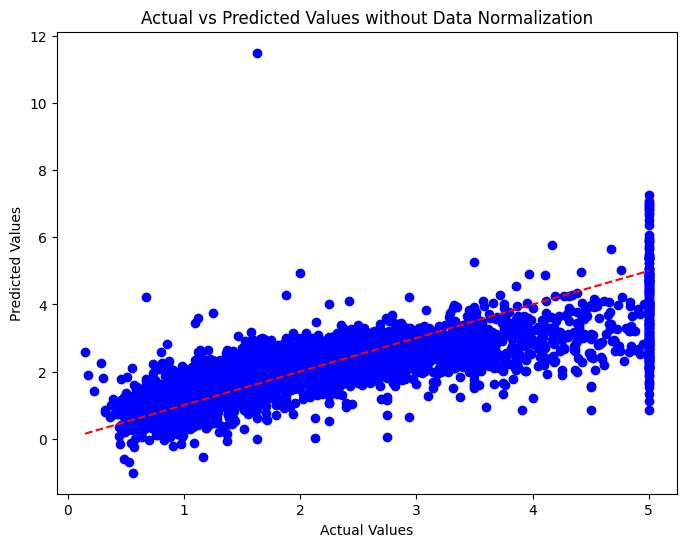

In [3]:
# Solution:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California House Prices dataset
california = fetch_california_housing()

# Split the dataset into features (X) and target (y)
X = california.data
y = california.target

# Print the feature names
feature_names = california.feature_names
print("Feature Names:", feature_names)
print(X[:1])

# Print the target variable name
target_variable_name = "MedHouseVal"  # Median house value in $100,000's
print("\nTarget Variable Name:", target_variable_name)
print(y[:1])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
R2= r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2:" , R2 )


#visualizing actual test_y vs pred_test_y
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Values without Data Normalization')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


#### Question 3.2 - (10 points)
Repeat 3.1 using the normalized features to train your model (use z-score). Compare your findings from 3.1 and 3.2 and report any observations. 
***

Mean Squared Error: 0.5558915986952375
R2: 0.5757877060324559


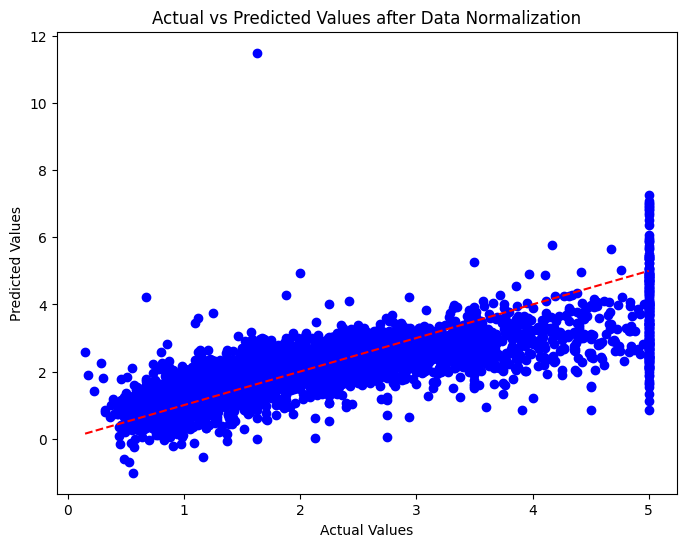

In [4]:
# Solution:
# create another model with normalized features
# Normalizing the independent variables using z-score normalization
data_mean = X.mean()
data_std = X.std()
# Perform z-score normalization
normalized_X = (X - data_mean) / data_std
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
R2= r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2:" , R2 )


#visualizing actual test_y vs pred_test_y
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Values after Data Normalization')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


The output in 3.1 and 3.2 appear to be identical. This should be because the distribution doesn't change.
***

#### Question 3.3 - (10 points)
Implement cross validation method (from scratch), and apply 12-fold cross validation on your model to enhance the fit of your model. Report the mean of the R2 and MSE scores as the mse and R2 of the best model. Print the coefficients (i.e., weights) of the best model and explain what do you consider to be the best model. 
***

Best Model: [ 2.69556553e+02  5.76812099e+00 -6.26376113e+01  3.81661759e+02
 -2.82349853e-03 -2.56176637e+00 -2.64068021e+02 -2.72295620e+02]
Mean Squared Error (CV): 0.5284882334798296
MSE Standard Deviation (CV): 0.02312554239747368
R2 score (CV): 0.6028374958036009
R2 Standard Deviation (CV): 0.014005883570687959


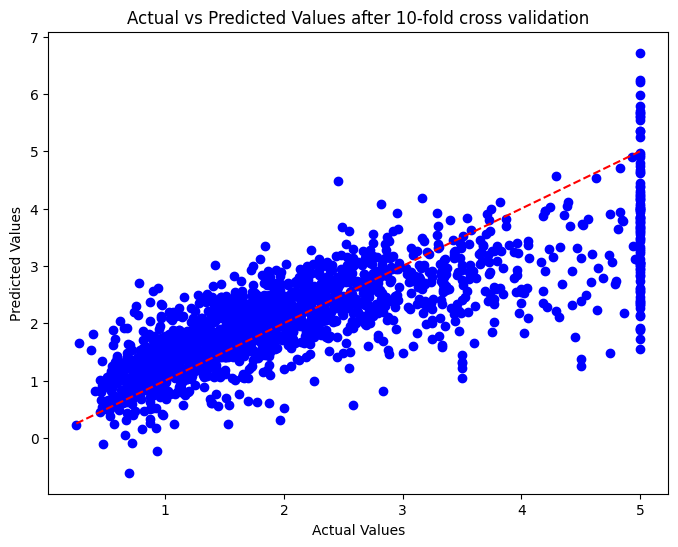

In [5]:
# Solution:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds
k = 12

# Shuffle the data indices
np.random.seed(42)
indices = np.random.permutation(len(normalized_X))

# Split the data into k folds
fold_size = len(normalized_X) // k
mse_scores = []
R2_scores = []
models = []

for i in range(k):
    # Define the indices for the current fold
    test_indices = indices[i * fold_size: (i + 1) * fold_size]
    train_indices = np.concatenate((indices[:i * fold_size], indices[(i + 1) * fold_size:]))

    # Split the data into train and test sets
    X_train, X_test = normalized_X[train_indices], normalized_X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    # Calculate the R2 score for this fold
    R2 = r2_score(y_test, y_pred)
    R2_scores.append(R2)
    
    # Store the model
    models.append((mse, model))



# Find the model with the lowest MSE
"""This line selects the model with the lowest mean squared error (MSE) 
from the list of models (models) based on the MSE values stored alongside 
each model during cross-validation."""
best_model = min(models, key=lambda x: x[0])[1]
print("Best Model:", best_model.coef_)


# Calculate the mean and standard deviation of R2 scores
mean_R2 = np.mean(R2_scores)
std_R2 = np.std(R2_scores)

print("Mean Squared Error (CV):", np.mean(mse_scores))
print("MSE Standard Deviation (CV):", np.std(mse_scores))

print("R2 score (CV):", mean_R2)
print("R2 Standard Deviation (CV):", std_R2)


#visualizing actual test_y vs pred_test_y
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Values after 10-fold cross validation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The best model chosen here the one with the lowest MSE.
***

### Question 4 - (20 points)
Answer the following questions:

#### Question 4.1 - (3 points)
What is the difference between Gradient Descent and Ordinary Lease Squares method? Explain the advantages and disadvantages of each approach.
***

OLS
- closed form solution for linear regression
- guaranteed to find optimal value to minimize sse
- relatively fast for smaller dataset

GD
- iterative optimization by updating gradient of loss function
- repeats until convergence at a minimum error
- not guaranteed to find global minimum
- slower than OLS
- more widely applicable, especially for more complex models and larger datasets

#### Question 4.2 - (2 points)
How does a negative or positive gradient indicate the direction towards achieving a sub-optimal or optimal weight? Explain your answer.
***

The gradient gives the direction of steepest ascent for your loss function. If this direction is negative or positive that indicates that the local minimum that is closest to the current error is in that opposite direction and that moving in that opposite direction will move you closer to that local minimum.

#### Question 4.3 - (10 points)
Provide the complete math for updating Wj associated with the jth attribute of a dataset using Gradient Descent weight update rule for finding the coefficients of a linear regression model. Use the Sum of Squared Residuals (SSR) as the loss (or cost) function to compute the gradient (i.e., weight change). Provide all the necessary details explaining the parameters used in your work.
***

The general idea is that you will need to expand the SSR formula then apply the chain rule.

Wj = Wj - Learning Rate * Gradient

In the following y_hat refers to the predicted target value

Gradient = dSSR/dWj --- derivative of SSR w.r.t corresponding weight

SSR = sum(yi - y_hat)^2 = sum(y - (W1x1 + W2x2 + ... + Wjxj + ... ))^2

dSSR/dWj = sum(dSSR/dy_hat * dy_hat/dWj) = sum(-2 (y - y_hat)(xj))

Here the xj is because the derivative of the y_hat wrt Wj is same as derivative of W T xj wrt W

#### Question 4.4 - (5 points)
Explain the strategy in and the difference between stochastic gradient descent and batch-gradient descent algorithmically. 
***

BGD:
- calculates gradient and updates weight using the entire dataset for each iteration
- error is calculated as average error over each data point - smoother gradient
- one iteration per epoch
- loading in the entire dataset can be computationally expensive

SGD
- calculates gradient and updates weight using one data point (or a few if minibatch) to calculate at each iteration
- error is calculated as error over each data point - can be noisier
- multiple iterations per epoch
- can be faster as working with smaller chunks of data


### Question 5 - (20 points)
Use California House Prices dataset for this question. 

#### Question 5.1 - (15 points)
Use stochastic gradient descent approach to train a linear regression model using all the features of the dataset. After each epoch of training, record the MSE and R2 scores of the linear regression model on training data and test data. Run your solution for 100 epochs. Plot the recorded MSE-train[], MSE-test in one figure, and R2-train[], R2-test in another figure (over 100 epochs). 
***

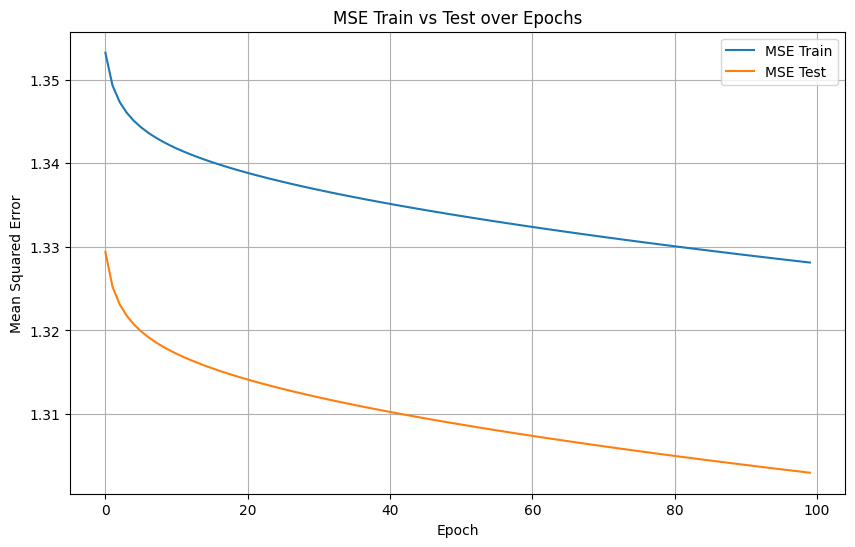

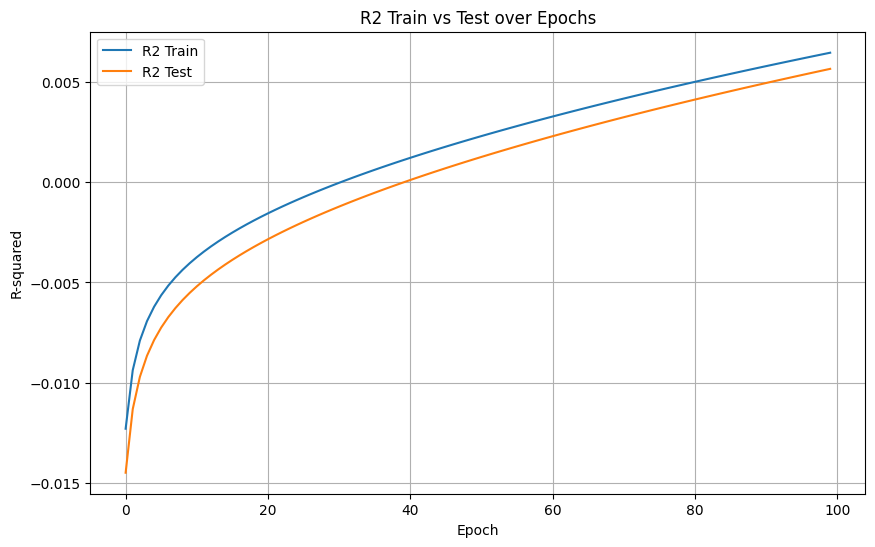

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
X, y = fetch_california_housing(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)

# Model definition with SGD
model = SGDRegressor(max_iter=100, eta0=0.01)  # Set epochs and learning rate

# Lists to store metrics
mse_train = []
mse_test = []
r2_train = []
r2_test = []

# Training loop for 100 epochs
for epoch in range(100):
    for i in range(len(X_train)):
        X_sample = X_train[i].reshape(1, -1)
        y_sample = y_train[i].reshape(1, )
        model.partial_fit(X_sample, y_sample)
    # model.fit(X_train, y_train)

    # Predict on train and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate MSE and R2 scores
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))
    r2_train.append(r2_score(y_train, y_pred_train))
    r2_test.append(r2_score(y_test, y_pred_test))

# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(range(100), mse_train, label='MSE Train')
plt.plot(range(100), mse_test, label='MSE Test')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Train vs Test over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot R2
plt.figure(figsize=(10, 6))
plt.plot(range(100), r2_train, label='R2 Train')
plt.plot(range(100), r2_test, label='R2 Test')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.title('R2 Train vs Test over Epochs')
plt.legend()
plt.grid(True)
plt.show()


dataset size:20640


SGD MSE: 8.171616969642475


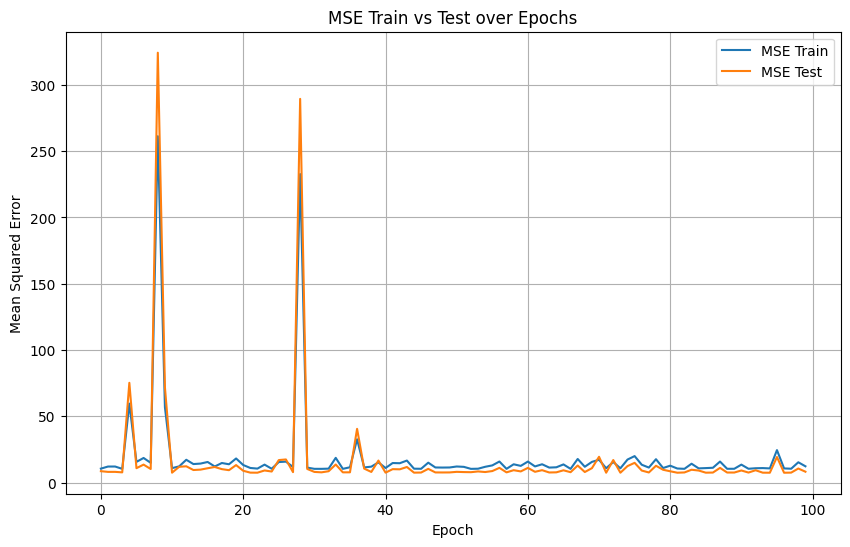

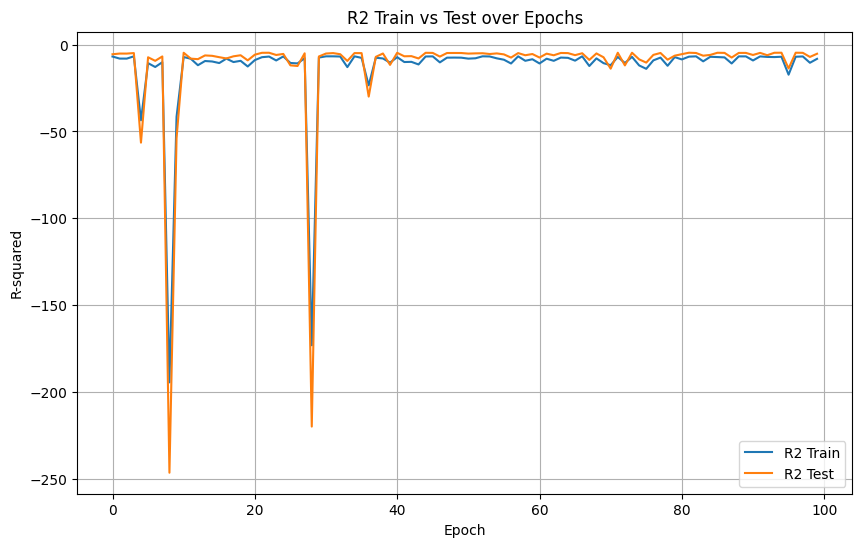

In [8]:

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)
# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, X_test, y_test, lr=0.01, epochs=100, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        m = X.shape[0]
        loss_history = []
        r2_history = []
        loss_history_test = []
        r2_history_test = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                    indices_test = np.random.choice(X_test.shape[0], batch_size)
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error)
                avg_gradient = sum(gradient) / X_batch.shape[0]
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient
            
            
            # generating the predictions
            y_pred = X.dot(self.theta)
            y_pred_test = X_test.dot(self.theta)
            
            mse = mean_squared_error(y, y_pred)
            loss_history.append(mse)
            r2 = r2_score(y, y_pred)
            r2_history.append(r2)

            mse_test = mean_squared_error(y_test, y_pred_test)
            r2_test = r2_score(y_test, y_pred_test)
            loss_history_test.append(mse_test)
            r2_history_test.append(r2_test)

        
        return loss_history, r2_history, loss_history_test, r2_history_test

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
loss_history, r2_history, loss_history_test, r2_history_test = sgd_model.fit(X_train_scaled, y_train, X_test_scaled, y_test, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("SGD MSE:", sgd_mse)

# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(range(100), loss_history, label='MSE Train')
plt.plot(range(100), loss_history_test, label='MSE Test')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Train vs Test over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot R2
plt.figure(figsize=(10, 6))
plt.plot(range(100), r2_history, label='R2 Train')
plt.plot(range(100), r2_history_test, label='R2 Test')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.title('R2 Train vs Test over Epochs')
plt.legend()
plt.grid(True)
plt.show()



#### Question 5.2 - (5 points)
Annotate your code. Explain the details of your understanding of the code below.
***

This code uses the SGD Regressor from sklearn.
It loops through 100 epochs and each epoch it calls partial fit to update the sgd model based on every datapoint in the model.
In this implementation, it loops through each datapoint in the model, but this would be more robust if implemented with random datapoints.
At the end of each epoch, the mse and r2 statistics are calculated on the training and test data. These are plotted at the end of training.